# Import libraries

In [1]:
import sys
from itertools import product
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice?!)
MODEL_DIR = Path().resolve().parent / "WellsCoppersmith1994"
sys.path.append(str(MODEL_DIR))

import run_average_displacement

# Run Average Displacement

## Single scenarios

A single scenario is defined as one magnitude/percentile/style. The default percentile is "0.5" and the default style is "all". Here is an example (note all parameters must be passed as keyword arguments).

In [3]:
df = run_average_displacement.run_ad(
    magnitude=7,
)
df

magnitude style  percentile    mu  sigma  avg_displ
0        7.0   all         0.5  0.03   0.36   1.071519

In [4]:
df = run_average_displacement.run_ad(magnitude=7, percentile=0.84, style="strike-slip")
df

magnitude        style  percentile    mu  sigma  avg_displ
0        7.0  strike-slip        0.84 -0.02   0.28    1.81321

The "reverse" model is not recommended by the authors and the user will be warned about this:

In [5]:
df = run_average_displacement.run_ad(magnitude=7, style="reverse")
df

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\WellsCoppersmith1994\run_average_displacement.py:152: UserWarning: Regressions for reverse-slip relationships are not significant at 95% probability level (per WC94). Use with caution.
  warnings.warn(msg)


magnitude    style  percentile    mu  sigma  avg_displ
0        7.0  reverse         0.5 -0.18   0.38   0.660693

## Multiple scenarios

Multiple magnitude/percentile/style scenarios can be run. All combinations are run. Note that `percentile=-1` returns the mean. Here is an example.

In [6]:
df = run_average_displacement.run_ad(magnitude=7, percentile=[0.16, 0.5, 0.84, -1])
df

magnitude style  percentile    mu  sigma  avg_displ
0        7.0   all        0.16  0.03   0.36   0.469889
1        7.0   all        0.50  0.03   0.36   1.071519
2        7.0   all        0.84  0.03   0.36   2.443458
3        7.0   all       -1.00  0.03   0.36   1.510802

## Create magnitude scaling plots

In [7]:
magnitudes = np.arange(5, 8.7, 0.2)
styles = ["Strike-Slip", "Normal", "Reverse", "All"]

results = run_average_displacement.run_ad(magnitude=magnitudes, style=styles)
results.head()

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\WellsCoppersmith1994\run_average_displacement.py:152: UserWarning: Regressions for reverse-slip relationships are not significant at 95% probability level (per WC94). Use with caution.
  warnings.warn(msg)


magnitude        style  percentile    mu  sigma  avg_displ
0        5.0  strike-slip         0.5 -1.82   0.28   0.015136
1        5.0       normal         0.5 -1.30   0.33   0.050119
2        5.0      reverse         0.5 -0.34   0.38   0.457088
3        5.0          all         0.5 -1.35   0.36   0.044668
4        5.2  strike-slip         0.5 -1.64   0.28   0.022909

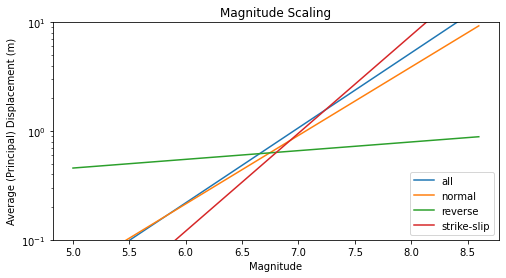

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for sof, group in results.groupby(["style"]):
    group = group.sort_values(by="magnitude")
    ax.semilogy(group["magnitude"], group["avg_displ"], label=sof)

ax.set(
    xlabel="Magnitude",
    ylabel="Average (Principal) Displacement (m)",
    title="Magnitude Scaling",
)
ax.set_ylim([0.1, 10])
ax.legend(loc="lower right");